In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [4]:
# Specify the path to your Excel file
csv_file_path = "D:\\3DPDAP\\BostonHousing.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame, for example, printing the first few rows
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Here, The Scailing and Transformation is Applied on 'nox' variable which is Nitric Oxide Concentration (PP10M)

In [8]:
df['nox']

0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: nox, Length: 506, dtype: float64

# Calculated Mean and Standard Deviation for Dataframe

In [9]:
mean_nox = df['nox'].mean()
mean_nox

0.5546950592885376

In [10]:
std_nox = df['nox'].std()
std_nox

0.11587767566755611

In [12]:
df['nox'].max()

0.871

In [13]:
df['nox'].min()

0.385

# Applying Mean Normalization to 'nox'

In [14]:
df['nox_normalized'] = (df['nox'] - mean_nox) / (df['nox'].max() - df['nox'].min())
df['nox_normalized']

0     -0.034352
1     -0.176327
2     -0.176327
3     -0.198961
4     -0.198961
         ...   
501    0.037664
502    0.037664
503    0.037664
504    0.037664
505    0.037664
Name: nox_normalized, Length: 506, dtype: float64

# Applying Standardization to nox

In [15]:
df['nox_standardized'] = ((df['nox'] - mean_nox) / std_nox)
df['nox_standardized']

0     -0.144075
1     -0.739530
2     -0.739530
3     -0.834458
4     -0.834458
         ...   
501    0.157968
502    0.157968
503    0.157968
504    0.157968
505    0.157968
Name: nox_standardized, Length: 506, dtype: float64

# Applying Robust Scailing Method to the nox

In [16]:
# Calculate the median and IQR for each variable
median_nox = df['nox'].median()
iqr_nox = df['nox'].quantile(0.75) - df['nox'].quantile(0.25)

# Perform robust scaling manually
df['nox_Robust'] = ((df['nox'] - median_nox) / iqr_nox)
df['nox_Robust']

0      0.000000
1     -0.394286
2     -0.394286
3     -0.457143
4     -0.457143
         ...   
501    0.200000
502    0.200000
503    0.200000
504    0.200000
505    0.200000
Name: nox_Robust, Length: 506, dtype: float64

# Applying Min-Max Scailing Method to the nox

In [19]:
# Perform Min-Max scaling manually
# Define the minimum and maximum values for scaling
min_nox = df['nox'].min()
max_nox = df['nox'].max()

df['nox_MinMax'] = (df['nox'] - min_nox) / (max_nox - min_nox)
df['nox_MinMax']

0      0.314815
1      0.172840
2      0.172840
3      0.150206
4      0.150206
         ...   
501    0.386831
502    0.386831
503    0.386831
504    0.386831
505    0.386831
Name: nox_MinMax, Length: 506, dtype: float64

# Applying Max Absolute Scailing Method to nox

In [21]:
# Find the maximum absolute value for both columns
max_nox = df['nox'].abs().max()

# Perform Max Absolute scaling manually
df['nox_Max_Absolute'] = df['nox'] / max_nox

df['nox_Max_Absolute']

0      0.617681
1      0.538462
2      0.538462
3      0.525832
4      0.525832
         ...   
501    0.657865
502    0.657865
503    0.657865
504    0.657865
505    0.657865
Name: nox_Max_Absolute, Length: 506, dtype: float64

# Applying Log-Transformation to nox

In [22]:
import numpy as np

# Apply log transformation to 'Age' and 'Income' columns
df['nox_Log'] = np.log(df['nox'])
df['nox_Log']

0     -0.619897
1     -0.757153
2     -0.757153
3     -0.780886
4     -0.780886
         ...   
501   -0.556870
502   -0.556870
503   -0.556870
504   -0.556870
505   -0.556870
Name: nox_Log, Length: 506, dtype: float64

# Applying Squareroot-Transformation to the nox

In [23]:
df['nox_Sqrt'] = np.sqrt(df['nox'])
df['nox_Sqrt']

0      0.733485
1      0.684836
2      0.684836
3      0.676757
4      0.676757
         ...   
501    0.756968
502    0.756968
503    0.756968
504    0.756968
505    0.756968
Name: nox_Sqrt, Length: 506, dtype: float64

# Applying Reciprocal-Transformation to nox

In [24]:
# Apply reciprocal transformation to 'Age' and 'Income' columns
df['nox_Reciprocal'] = 1 / df['nox']
df['nox_Reciprocal']

0      1.858736
1      2.132196
2      2.132196
3      2.183406
4      2.183406
         ...   
501    1.745201
502    1.745201
503    1.745201
504    1.745201
505    1.745201
Name: nox_Reciprocal, Length: 506, dtype: float64

# Displaying Histograms of variable 'nox' for all Scaling & Transformation Methods which are covered here

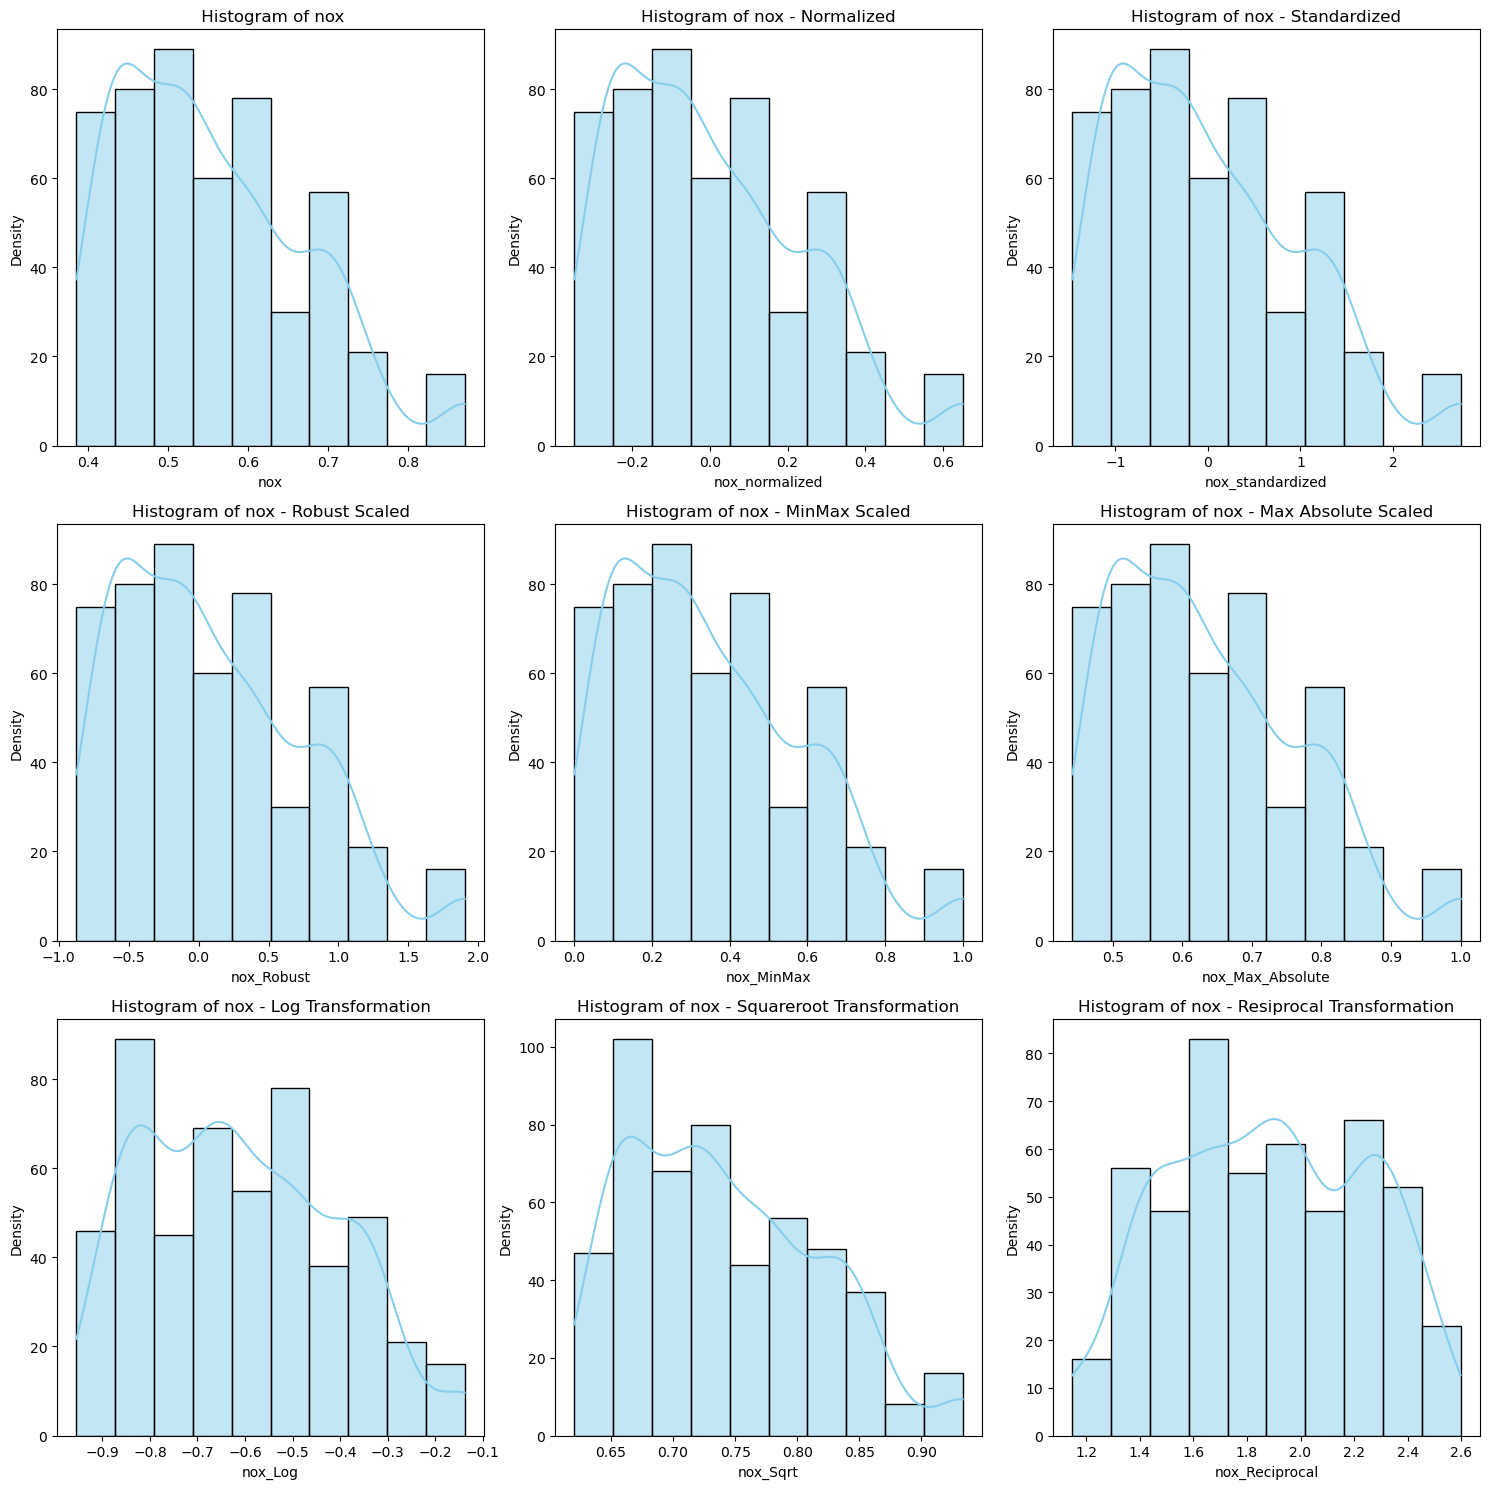

In [25]:
import seaborn as sns


# Create histograms for each dataframe with KDE
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Histogram for nox
sns.histplot(df['nox'], bins=10, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_xlabel('nox')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title(' Histogram of nox')

# Histogram for nox_normalized
# Assuming you have these columns in your dataframe
sns.histplot(df['nox_normalized'], bins=10, kde=True, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_xlabel('nox_normalized')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Histogram of nox - Normalized')

# Histogram for nox_standardized
# Assuming you have these columns in your dataframe
sns.histplot(df['nox_standardized'], bins=10, kde=True, ax=axes[0, 2], color='skyblue')
axes[0, 2].set_xlabel('nox_standardized')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Histogram of nox - Standardized')

# Histogram for nox_Robust
# Assuming you have these columns in your dataframe
sns.histplot(df['nox_Robust'], bins=10, kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_xlabel('nox_Robust')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Histogram of nox - Robust Scaled')

# Histogram for nox_MinMax
# Assuming you have these columns in your dataframe
sns.histplot(df['nox_MinMax'], bins=10, kde=True, ax=axes[1, 1], color='skyblue')
axes[1, 1].set_xlabel('nox_MinMax')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Histogram of nox - MinMax Scaled')

# Histogram for nox_Max_Absolute
# Assuming you have these columns in your dataframe
sns.histplot(df['nox_Max_Absolute'], bins=10, kde=True, ax=axes[1, 2], color='skyblue')
axes[1, 2].set_xlabel('nox_Max_Absolute')
axes[1, 2].set_ylabel('Density')
axes[1, 2].set_title('Histogram of nox - Max Absolute Scaled')

# Histogram for nox_Log
# Assuming you have these columns in your dataframe
sns.histplot(df['nox_Log'], bins=10, kde=True, ax=axes[2, 0], color='skyblue')
axes[2, 0].set_xlabel('nox_Log')
axes[2, 0].set_ylabel('Density')
axes[2, 0].set_title('Histogram of nox - Log Transformation')

# Histogram for nox_Sqrt
# Assuming you have these columns in your dataframe
sns.histplot(df['nox_Sqrt'], bins=10, kde=True, ax=axes[2, 1], color='skyblue')
axes[2, 1].set_xlabel('nox_Sqrt')
axes[2, 1].set_ylabel('Density')
axes[2, 1].set_title('Histogram of nox - Squareroot Transformation')

# Histogram for nox_Reciprocal
# Assuming you have these columns in your dataframe
sns.histplot(df['nox_Reciprocal'], bins=10, kde=True, ax=axes[2, 2], color='skyblue')
axes[2, 2].set_xlabel('nox_Reciprocal')
axes[2, 2].set_ylabel('Density')
axes[2, 2].set_title('Histogram of nox - Resiprocal Transformation')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()